In [2]:
# 두 개의 클래스로만 분류한 데이터(생선 길이와 생선 무게)
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [3]:
import numpy as np

"""
학습 훈련 데이터를 1차원 배열 2개를 행렬로 만들기
np의 column_stack 함수 : 1차원 배열 인덱스 같은 애들끼리 짝지어서 요소화한 행렬(2차원 배열) 만들기
파라미터는 배열들 모아둔 튜플
np.column_stack(([1, 2, 3], [4, 5, 6]))
"""
fish_data = np.column_stack((fish_length, fish_weight))
# print(fish_data)
# print(fish_data[:5])

"""
타깃 데이터 구축
np.ones(35) : 요소가 1.0이고 길이 35인 넘파이 배열 출력(출력이 이상한 건, 걍 보기 좋게 float 배열 출력한 거)
numpy.concatenate((a1, a2, ...), axis=0) : 합치려는 동일 차원 배열들 튜플, 방향 설정(행(디폴트)방향? 열방향?)
"""
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

In [4]:
from sklearn.model_selection import train_test_split

"""
사이킷런으로 학습훈련 세트와 예측테스트 세트 나누기
자체적으로 섞어주기까지 함 오...
"""
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, # 학습훈련 데이터 세트
    fish_target, # 예측테스트 데이터 세트
    stratify=fish_target, # 클래스, 즉 데이터가 속하는 범주(레이블)의 비율을 원본(fish_target)과 비슷하게 훈련 세트와 테스트 세트로 나눔
    random_state=42) # 랜덤 시드도 정해주면서 재현성까지 확보(물론 얜 학습이나 개발할 때만 필요... 실제 배포는 다양성이 더 중요하니)

In [5]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input, train_target) # 학습(훈련)
kn.score(test_input, test_target) # 예측(평가)
# 1점(100%)

1.0

In [6]:
"""
문제점 발생, 아무리 봐도 도미 같은데..?
"""
print(kn.predict([[25, 150]])) # [0.] 출력... 도미 예상했는데 빙어가 출력됨

[0.]


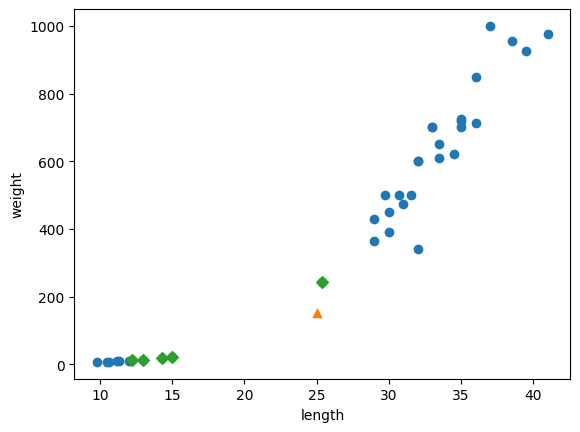

In [7]:
"""
인접한 5개의 이웃들 인덱스와 그 거리를 추출
산점도에 기입하여 분산 확인
"""
distances, indexes = kn.kneighbors([[25, 150]])

import matplotlib.pyplot as plt

plt.scatter(train_input[:,0], train_input[:,1]) # 훈련 데이터들 길이, 무게
plt.scatter(25, 150, marker='^') # 이상한 물고기
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D') # 이상한 물고기의 이웃 5개 별도 표기
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [8]:
# 가까운 놈들의 정체
print(train_input[indexes]) # 가까운 이웃들
print(distances) # 가까운 이웃들 거리
print(train_target[indexes]) # 가까운 이웃들의 정답.. 아, 도미 예상과 다르게 빙어 이웃들이 훨씬 많네요잉

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]
[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]
[[1. 0. 0. 0. 0.]]


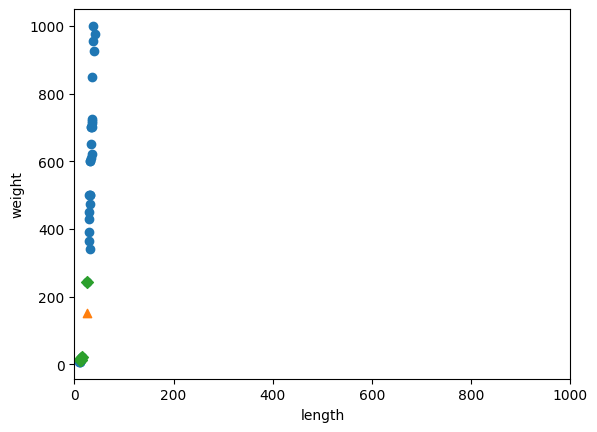

In [9]:
# 그래서 x축과 y축의 정수 범위를 강제로 통일한다..??
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlim((0, 1000)) # x축의 범위를 조정하는 함수...지만 잘못된 선택
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [12]:
mean = np.mean(train_input, axis=0) # 평균 계산, 열 특성(세로) 방향으로 -> 길이의 평균과 무게의 평균 연산
std = np.std(train_input, axis=0) # 표준편차 계산, 열 특성(세로) 방향으로 -> 길이의 표준편차와 무게의 표준편차 연산

train_scaled = (train_input - mean) / std # numpy의 차원 확장(broadcasting) 덕분에 이런 연산이 가능... 평균과 표준편차를 각 행에 복사해 연산
# print(train_scaled)
new = ([25, 150] - mean) / std # 이상한 물고기도 마찬가지
"""
당연한 얘기지만... 훈련 데이터를 전처리한 방식은 테스트 데이터에서도 동일하게 적용해야 할 것
"""

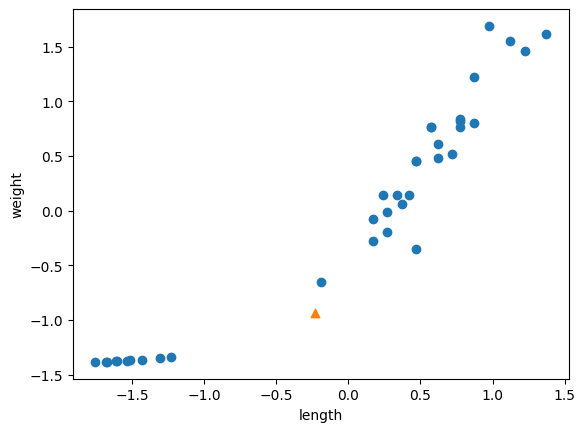

In [13]:
"""
이제 표준화 전처리된 데이터를 다시 산점도로 나타내보자
전처리 전과 같지만, x축과 y축의 스케일이 같아졌다:)
"""
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [14]:
"""
다시 모델을 학습 훈련하고 예측 테스트 해보자
"""
kn.fit(train_scaled, train_target) # 새롭게 학습 훈련
test_scaled = (test_input - mean) / std
kn.score(test_scaled, test_target) # 새롭게 예측 테스트, 역시나 100점

1.0

[1.]
[[[-0.19005591 -0.65604058]
  [ 0.17057727 -0.28177396]
  [ 0.27075315 -0.19825992]
  [ 0.47110492 -0.35291555]
  [ 0.17057727 -0.07453542]]]
[[0.2873737  0.7711188  0.89552179 0.91493515 0.95427626]]
[[1. 1. 1. 1. 1.]]


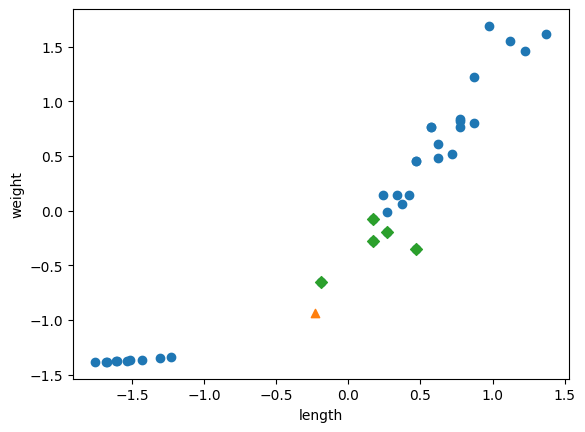

In [15]:
print(kn.predict([new])) # 이번엔 우리가 예측한 대로 도미(1)가 나옴

distances, indexes = kn.kneighbors([new])
print(train_scaled[indexes]) # 가까운 이웃들
print(distances) # 가까운 이웃들 거리
print(train_target[indexes]) # 가까운 이웃들 정체, 전부 도미네요:)

# 다시 이웃 5개를 찍어보자
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()